<a href="https://colab.research.google.com/github/yj9889/ESAA2/blob/main/220411%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09. 비지도학습

>## 9.1 군집
비슷한 샘플을 클러스터로 모은다. 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소에 사용

* 이상치 탐지

:'정상' 데이터가 어떻게 보이는지 학습하고 비정상 샘플을 감지하는 데 사용. 제조 라인에서 결함 제품을 감지하거나 시계열 데이터에서 새로운 트렌드 찾음

*  밀도 추정

: 데이터셋 생성 확률 과정의 확률 밀도 함수 pdf 추정. 이상치 탐지에 널리 사용. 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성 높음. 데이터 분석과 시각화에도 유용


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [31]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

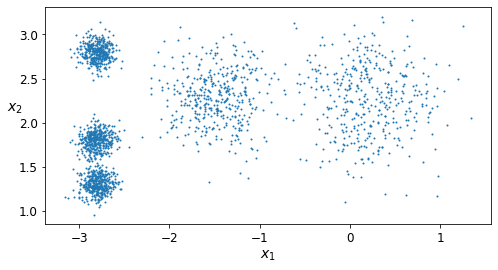

In [32]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

>> ## 9.1.1 K-평균
반복 몇 번으로 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있음.
각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플 할당

In [33]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [34]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

군집에서 각 샘플의 레이블: 알고리즘이 샘플에 할당한 클러스터의 인덱스

In [35]:
y_pred is kmeans.labels_

True

In [36]:
kmeans.cluster_centers_ # 학습된 센트로이드 확인

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [37]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [38]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

## 보로노이 다이어그램: 클러스터의 결정 경계 그림
경계 근처에 있는 일부 샘플: 잘못된 군집에 할당됨. 하지만 전반적으로 아주 좋음. 클러스터의 크기가 많이 달라 잘 작동되지 않음.

그림 저장: voronoi_plot


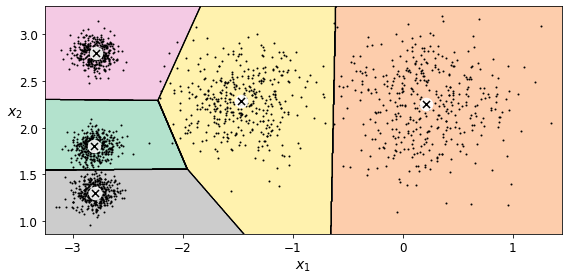

In [39]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

* 하드 군집: 각 샘플에 대해 가장 가까운 군집 선택
* 소프트 군집: 각 샘플에서 모든 센트로이드까지 거리 측정.
  * transform() 메서드 활용
  * 측정 값이 다른 분류기 등에 활용될 수 있음.

In [40]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

## K-평균 알고리즘
: 가장 빠른 군집 알고리즘 중 하나이면서 동시에 가장 간단한 알고리즘
* 센트로이드가 주어지면, 데이터셋의 모든 샘플에 가장 가까운 센트로이드의 클러스터 할당
+ 모든 샘플의 레이블이 주어지면, 각 클러스터에 속한 샘플의 평균을 계산해 모든 센트로이드를 쉽게 구함
* 모두 주어지지 않으면, 센트로이드를 랜덤하게 선정하고 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 과정 반복


* 계산 복잡도: 샘플 개수 m, 클러스터 개수 k, 차원 개수 n에 선형적

## 센트로이드 초기화 방법
* 센트로이드 위치를 근사하게 알 수 있다면, 
  * *init* 에 센트로이드 리스트를 담은 넘파이 배열
  * *n_init = 1*

In [42]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

* 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션 선택하는 방법
	* n_init 변수로 랜덤 초기화 횟수 조절(기본값: 10)
	* 이너셔: 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리 -> 가장 가까운 것 반환

In [44]:
kmeans.score(X) # 큰 값이 좋게 하기 위해 음수

-211.59853725816836

## K-평균 ++ 알고리즘
* 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계 소개
	* k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성 크게 낮춤.


## K-평균 속도 개선과 미니배치 K-평균
* *algorithm="elkan"*
* 전체 데이터셋을 사용해 반복하지 않고 각 반복마다 미니배치를 사용해 센트로이드 조금씩 이동

In [45]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

데이터셋이 메모리에 다 들어가지 못하는 경우 memmap 클래스 활용

또는 MiniBatchKMeans 클래스의 partial_fit() 메서드에 한 번에 하나의 미니배치 전달

클러스터 개수가 증가할 때 미니배치가 일반 K-평균 알고리즘보다 조금 느리다.

## 최적의 클러스터 개수 k 찾기
* 실루엣 점수: 모든 샘플에 대한 실루엣 계수에 대한 평균
	* (b-a) / max(a,b)
		* a: 동일한 클러스터이 있는 다른 샘플까지의 평균 거리
		* b: 가장 가까운 클러스터까지 평균 거리
    
자신이 속한 클러스터 제외하고 b가 최소인 클러스터
* 실루엣 계수: -1~+1(+1에 가까울수록 자신의 클러스터 안에 잘 속함)

In [46]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

>> ## 9.1.2 K-평균의 한계

알고리즘을 여러 번 실행해야 하고, 클러스터 개수를 지정해야 최적이 아닌 솔루션 피할 수 있음.

클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다.
k-평균 실행 전에 입력 특성의 스케일을 맞추는 것이 중요하다.

>> ## 9.1.3 군집을 사용한 이미지 분할
* 이미지 분할: 이미지를 segment 여러 개로 분할
* 시맨틱 분할: 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당.
* 색상 분할: 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당할 것.

In [49]:
# 무당벌레 이미지를 다운로드합니다
import urllib.request
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7fab93185cd0>)

In [50]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [51]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

그림 저장: image_segmentation_diagram


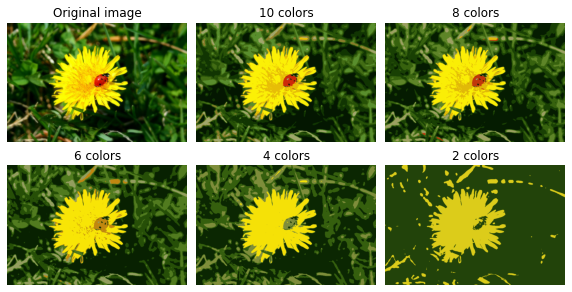

In [52]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

>> ## 9.1.4 군집을 사용한 전처리
군집은 차원 축소에 효과적이며 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있음.

In [53]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [56]:
log_reg.score(X_test, y_test)

0.9688888888888889

k-평균을 전처리 단계로 사용해 더 좋아지는지 확인
* 파이프라인을 만들어 훈련 세트를 50개의 클러스톨 모음.
* 이미지를 50개 클러스터까지의 거리로 바꾸고 로지스틱 회귀 적용

In [57]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [58]:
pipeline.score(X_test, y_test)

0.9777777777777777

가장 좋은 k 값은 교차 검증에서 가장 좋은 분류 성능을 내는 값

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [60]:
grid_clf.best_params_
grid_clf.score(X_test, y_test)

AttributeError: ignored

>> ## 9.1.5 군집을 사용한 준지도 학습
레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용


In [61]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

* 대표 이미지: 훈련 세트를 클러스터로 모은 뒤 각 클러스터에서 센트로이드에 가장 가까운 이미지 찾음

In [62]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [63]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [64]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.09555555555555556

* 레이블 전파: 레이블을 동일한 클러스터에 있는 모든 샘플로 전파

In [65]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [66]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test) # 아주 조금 높은 정확도

0.15333333333333332

In [67]:
# 센트로이드와 가까운 샘플의 20%에만 레이블 전파
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [68]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.15555555555555556

In [69]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.18900343642611683

* 능동 학습: 모델과 훈련 세트를 지속적으로 향상하기 위한 다음 단계
	* 불확실성 샘플링

>> ## 9.1.6 DBSCAN
모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능
* 핵심 샘플: 밀집된 지역에 있는 샘플

In [70]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [71]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

* 핵심 샘플의 인덱스: *core_sample_indices_*
* 핵심 샘플 자체: *components_*

In [72]:
len(dbscan.core_sample_indices_)
dbscan.core_sample_indices_[:10]
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

predict 말고 fit_predict만 제공 - 새로운 샘플에 대해 클러스터를 예측할 수 없음.

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [74]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2])

In [75]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [76]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  3, -1])

>> ## 9.1.7 다른 군집 알고리즘
* 병합 군집
* BIRCH
* 평균 - 이동
* 유사도 전파
* 스팩트럼 군집

> ## 9.2 가우시안 혼합
샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터 형성.(보통 타원형)

각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다름.

In [77]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [78]:
gm.weights_
gm.means_

array([[-0.74503074,  0.55807632],
       [ 1.73110722, -0.06902321],
       [ 0.4950664 ,  0.25373843]])

In [79]:
gm.converged_

gm.n_iter_

17

In [80]:
gm.predict(X)
gm.predict_proba(X)

array([[9.12595056e-014, 2.30146837e-081, 1.00000000e+000],
       [7.47233037e-120, 3.39933511e-004, 9.99660066e-001],
       [2.17446845e-107, 9.48577999e-007, 9.99999051e-001],
       ...,
       [1.43718998e-182, 9.84186191e-001, 1.58138088e-002],
       [9.99684465e-001, 1.66671181e-161, 3.15534827e-004],
       [4.32492679e-045, 5.19983644e-039, 1.00000000e+000]])

In [81]:
X_new, y_new = gm.sample(6)
X_new
y_new

array([0, 1, 1, 1, 2, 2])

In [82]:
gm.score_samples(X)

array([-1.59760943e+00, -1.83480188e+00, -1.56859578e+00, -1.90181248e+00,
       -2.43278366e-01, -1.34340986e+00, -1.58942671e+00, -1.59095129e+00,
       -3.48586901e-01, -1.79801683e+00, -1.86745681e+00, -1.66878897e+00,
       -1.44692396e+00, -4.68986083e-01, -8.67052879e-01,  2.00709206e-02,
       -2.14236134e+00, -7.08571708e-01, -1.97978983e+00, -8.67185148e-01,
       -1.76567591e+00, -1.76795375e+00, -1.20391122e-01, -1.59942948e+00,
       -1.54386695e+00, -1.76015872e+00, -1.66076963e+00, -1.22061360e+00,
       -3.22723479e-01, -5.49875652e-01, -4.98285317e-01, -1.43940247e+00,
       -1.82093613e+00, -2.02190156e+00,  8.50664496e-04, -1.96534568e+00,
       -1.57429254e+00, -1.28026138e+00, -2.83331977e-01, -1.56852030e+00,
       -1.20480578e+00, -1.66428926e+00, -1.01201107e+00, -1.19939167e+00,
       -1.43416458e+00, -2.11803830e+00, -1.70516741e+00, -1.57158084e+00,
       -3.26271946e-01, -5.77558013e-01, -1.82225216e+00, -8.95679851e-01,
       -1.96859753e+00, -

>> ## 9.2.1 가우시안 혼합을 사용한 이상치 탐지

In [83]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

NameError: ignored

<Figure size 576x288 with 0 Axes>

>> ## 9.2.2 클러스터 개수 선택하기
관성이나 실루엣 점수는 모두 원형 군집을 가정하기 때문에 가우시안 혼합 모델에 사용할 수 없습니다. 대신 BIC(Bayesian Information Criterion)나 AIC(Akaike Information Criterion) 같은 이론적 정보 기준을 최소화하는 모델을 찾을 수 있습니다:

BIC와 AIC 모두 모델이 많은 파라미터(예를 들면 많은 군집)를 학습하지 못하도록 제한합니다. 그리고 데이터에 잘 맞는 모델(즉, 관측 데이터에 가능도가 높은 모델)에 보상을 줍니다.

In [84]:
gm.bic(X)

2808.388903161654

In [85]:
gm.aic(X)

2724.9570634189577

>> ## 9.2.3 베이즈 가우시안 혼합 모델

In [86]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.12, 0.12, 0.13, 0.16, 0.12, 0.13, 0.14, 0.  , 0.08, 0.  ])

>> ## 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘